<a href="https://colab.research.google.com/github/YahtzeeRage/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

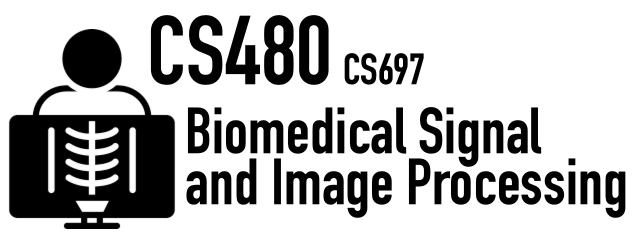
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

720 720


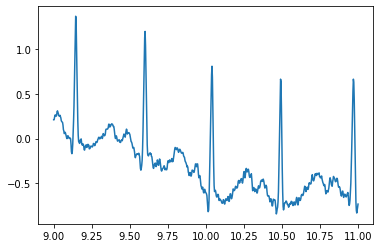

In [5]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

# I am going to go with the interpretation of 9 to 11 seconds where 9 is the start-time marker and 11 is the end-time marker

START = 9
STOP = 11
SAMPLING_INTERVAL = 1/SAMPLING_RATE
samples_inRange = numpy.arange(START, STOP, SAMPLING_INTERVAL)


ecgData_inRange = ecg[START*SAMPLING_RATE:STOP*SAMPLING_RATE]
print(samples_inRange.size, ecgData_inRange.size)
plt.plot(samples_inRange, ecgData_inRange)


**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


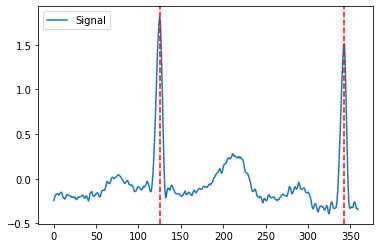

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

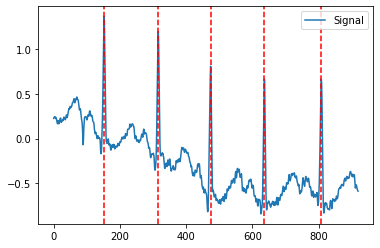

In [11]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

# I extended the range by 100 samples to give enough space to allow detecting the spike, but not so much space that an extra spike is added to the graph


_, rpeaks_custom = nk.ecg_peaks(ecg[START*SAMPLING_RATE-100:STOP*SAMPLING_RATE+100], sampling_rate=SAMPLING_RATE)
ecg_inRange = ecg[START*SAMPLING_RATE-100:STOP*SAMPLING_RATE+100]

plot = nk.events_plot(rpeaks_custom['ECG_R_Peaks'], ecg_inRange)


**Task 3:** Detect Heartrate. [15 Points]

In [12]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [13]:
#I will take the every peak index and subtract away the index of the peak that came before it
delta_rpeaks = rpeaks['ECG_R_Peaks'][1:] - rpeaks['ECG_R_Peaks'][:-1]
print(delta_rpeaks[:30])

print("converted to BPM:")
delta_rpeaks_beatsPerMinute = (SAMPLING_RATE / delta_rpeaks)*60
print(delta_rpeaks_beatsPerMinute[:30])

# the patient's heart rate already looks quite elevated past the normal healthy range of 60-100 bpm,
# but beat to beat it looks fairly regular

[218 209 196 196 186 187 184 190 189 185 186 180 177 171 177 169 167 164
 158 162 172 181 181 172 170 160 172 173 166 173]
converted to BPM:
[ 99.08256881 103.3492823  110.20408163 110.20408163 116.12903226
 115.50802139 117.39130435 113.68421053 114.28571429 116.75675676
 116.12903226 120.         122.03389831 126.31578947 122.03389831
 127.81065089 129.34131737 131.70731707 136.70886076 133.33333333
 125.58139535 119.33701657 119.33701657 125.58139535 127.05882353
 135.         125.58139535 124.85549133 130.12048193 124.85549133]


In [14]:



print("The average heartbeat in BPM across the whole ecg of {} beats is:".format(delta_rpeaks_beatsPerMinute.size))
print(np.mean(delta_rpeaks_beatsPerMinute))
print("The heartbeat looks quite high but close to the normal resting heartbeat range of 60-100 for an adult")
print()
print("However, the standard deviation of the heartbeat across the whole ecg compared to the first 100 beats and the last 100 beats is:")
print(np.std(delta_rpeaks_beatsPerMinute), np.std(delta_rpeaks_beatsPerMinute[:100]), np.std(delta_rpeaks_beatsPerMinute[-100:]))
print()
print("the standard deviation for the whole ecg compared to the first is a bit higher")
print("so clearly the patients heartbeat later on isn't always as regular as it looks in the beginning")
print()
print("sure enough here is at least one extaordinarily slow heartrate followed by an extraordinarily high heartrate")
print("Thus this heartbeat is quite irregular after all")
print(delta_rpeaks_beatsPerMinute[delta_rpeaks_beatsPerMinute.argmax()-5:delta_rpeaks_beatsPerMinute.argmax()+5])
print()
print("With such an outlier and likely many more in the mix let's just estimate the heartbeat for the first 100 beats as well to compare")
print(np.mean(delta_rpeaks_beatsPerMinute[:100]))
print("The heartrate is quite elevated indeed and well robustly past the normal healthy resting range")

The average heartbeat in BPM across the whole ecg of 502 beats is:
103.97419768424372
The heartbeat looks quite high but close to the normal resting heartbeat range of 60-100 for an adult

However, the standard deviation of the heartbeat across the whole ecg compared to the first 100 beats and the last 100 beats is:
13.890133368188398 10.961480637158653 11.199944753929636

the standard deviation for the whole ecg compared to the first is a bit higher
so clearly the patients heartbeat later on isn't always as regular as it looks in the beginning

sure enough here is at least one extaordinarily slow heartrate followed by an extraordinarily high heartrate
Thus this heartbeat is quite irregular after all
[108.54271357 106.40394089 110.20408163  23.12633833  98.63013699
 144.96644295 114.28571429 112.5        104.34782609 101.4084507 ]

With such an outlier and likely many more in the mix let's just estimate the heartbeat for the first 100 beats as well to compare
112.89733107854921
The hea

**Task 4:** Detect P Q S T Peaks. [25 Points]

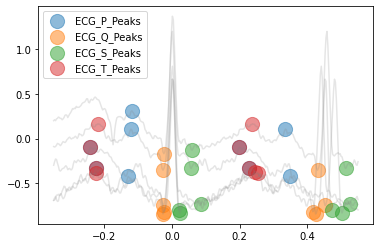

In [15]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

ecg_inRange = ecg[START*SAMPLING_RATE-100:STOP*SAMPLING_RATE+100]
_,rpeaks_pqst = nk.ecg_peaks(ecg[START*SAMPLING_RATE-100:STOP*SAMPLING_RATE+100], sampling_rate=SAMPLING_RATE)


_, waves_peak = nk.ecg_delineate(ecg_inRange, rpeaks_pqst['ECG_R_Peaks'], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')



In [16]:
# TODO Does the detection work well?

# the detection appears to be very rough there isn't that one clean curve like there was in the neurokit demo.
# It is approximately correct to the point that the peaks are detected in roughly the right order.
# However the peaks look very mishapen on average and have quite differing baselines.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

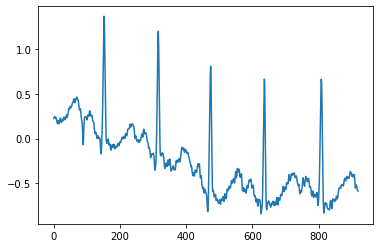

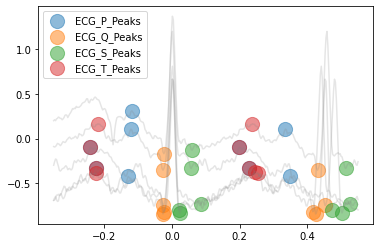

In [17]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

# I went with 920 samples / 5 rpeaks because I liked the look of that better

OVERVIEW_START = START*SAMPLING_RATE - 100
OVERVIEW_STOP = STOP*SAMPLING_RATE + 100


ecg_overviewRange = ecg[OVERVIEW_START:OVERVIEW_STOP]
_, rpeaks_overviewRange = nk.ecg_peaks(ecg_overviewRange, sampling_rate=SAMPLING_RATE)
rpeaks_overviewRange_arr_corrected = rpeaks_overviewRange['ECG_R_Peaks']


plt.plot(ecg_overviewRange)
_, waves_peaks = nk.ecg_delineate(ecg_overviewRange, rpeaks_overviewRange_arr_corrected, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')


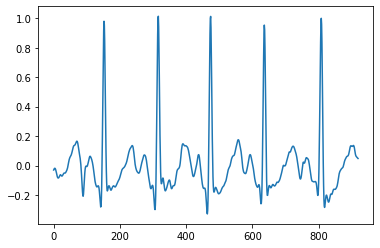

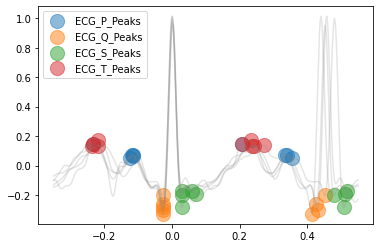

In [18]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

# After a lot of testing, I found that a lowcut of 2 gets rid of the base shifting of both the R peak and the rest of the other peaks
# I also found a high cut of 30 makes the data sharper and less noisy without getting rid of the important bits of the signal

filtered_ecg_inRange = nk.signal_filter(ecg_overviewRange,lowcut=2,highcut=30,sampling_rate=SAMPLING_RATE)
plt.plot(filtered_ecg_inRange)
_, waves_peaks = nk.ecg_delineate(filtered_ecg_inRange, rpeaks_overviewRange_arr_corrected, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [19]:
# TODO Does the filtering improve the result?

# It is not as perfect as the neurokit demo example data, but it is an amazing improvement over what it was before. 
# The data now is mostly on the same converged line and the peak predictions are overlapping very well. 
# The PQRST curve is also a lot more clean looking on this combined peaks graph and now it is much easier for me
# to intuitively say that this patient clearly has an elevated st peaks which indicate heart problems such as an infarction.

In [20]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#